In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

In [70]:
# Data cleaning
# Drop the 'Cabin' column - it has excessive missing values 
# Drop redundant columns  
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Embarked'].fillna('S', inplace=True)

In [71]:
# Encode categorical variables
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

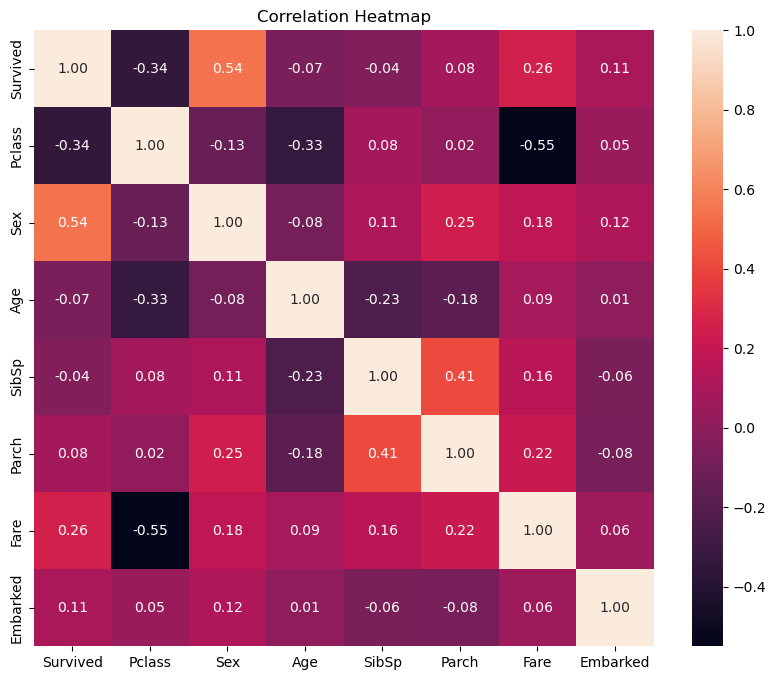

In [72]:
# Correlation heatmap  
plt.figure(figsize=(10, 8))  
sns.heatmap(titanic_df.corr(), annot=True, fmt=".2f")  
plt.title('Correlation Heatmap')  
plt.show()

In [73]:
# Create dummy variables for Pclass
titanic_df = pd.get_dummies(titanic_df, columns=['Pclass'])

In [74]:
# EDA
print(titanic_df.describe())
print(titanic_df.info())
print(titanic_df.corr())

         Survived         Sex         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    0.352413   29.699118    0.523008    0.381594   32.204208   
std      0.486592    0.477990   13.002015    1.102743    0.806057   49.693429   
min      0.000000    0.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   22.000000    0.000000    0.000000    7.910400   
50%      0.000000    0.000000   29.699118    0.000000    0.000000   14.454200   
75%      1.000000    1.000000   35.000000    1.000000    0.000000   31.000000   
max      1.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Pclass_1    Pclass_2    Pclass_3  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.361392    0.242424    0.206510    0.551066  
std      0.635673    0.428790    0.405028    0.497665  
min      0.000000    0.000000    0.000000    0

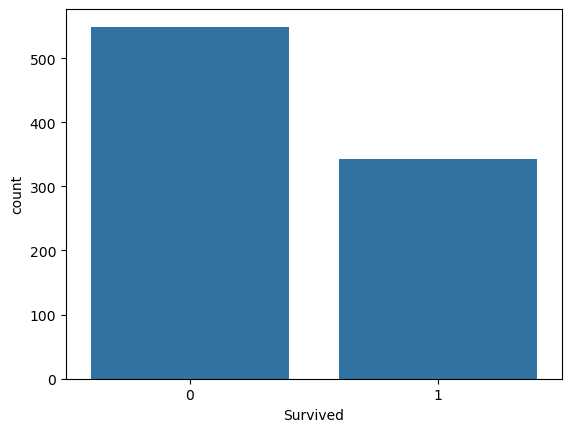

In [75]:
sns.countplot(x='Survived', data=titanic_df)
plt.show()

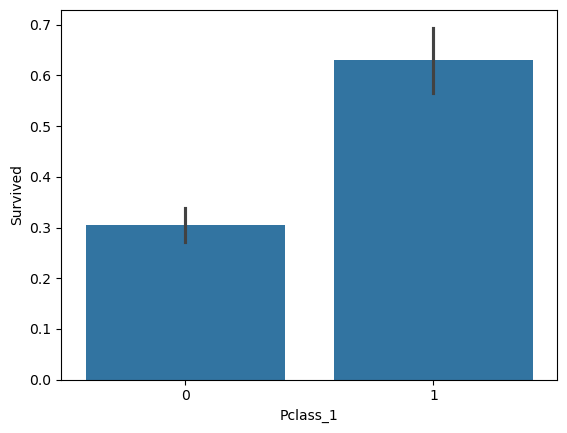

In [76]:
sns.barplot(x='Pclass_1', y='Survived', data=titanic_df)
plt.show()

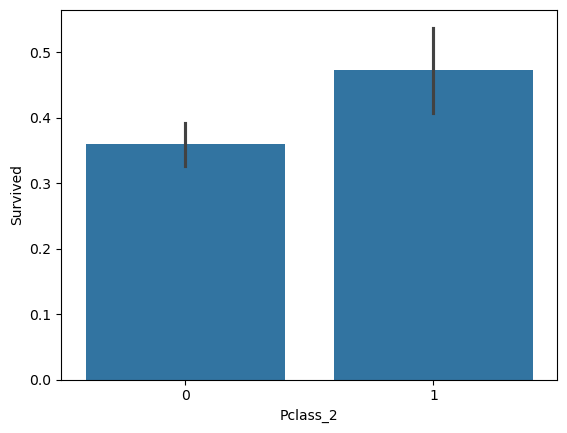

In [77]:
sns.barplot(x='Pclass_2', y='Survived', data=titanic_df)
plt.show()

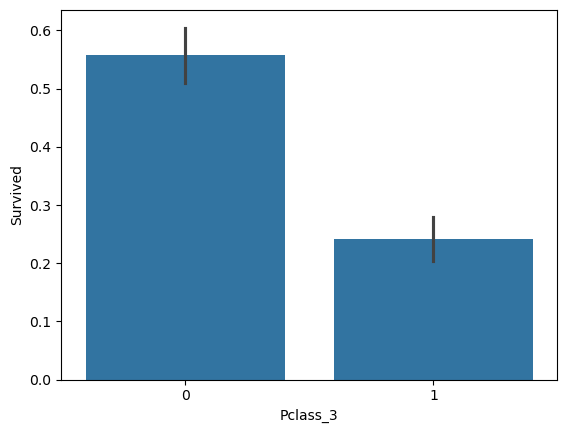

In [78]:
sns.barplot(x='Pclass_3', y='Survived', data=titanic_df)
plt.show()

In [79]:
# Feature extraction
X = titanic_df.drop(['Survived'], axis=1)
y = titanic_df['Survived']

In [80]:
X

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,0,0,0,1
1,1,38.000000,1,0,71.2833,1,1,0,0
2,1,26.000000,0,0,7.9250,0,0,0,1
3,1,35.000000,1,0,53.1000,0,1,0,0
4,0,35.000000,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,0,1,0
887,1,19.000000,0,0,30.0000,0,1,0,0
888,1,29.699118,1,2,23.4500,0,0,0,1
889,0,26.000000,0,0,30.0000,1,1,0,0


In [81]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression, LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [83]:

# Initialize the models  
models = {  
    'Linear Regression': LinearRegression(),  
    'Logistic Regression': LogisticRegression(max_iter=1000),  
    'K Nearest Neighbours': KNeighborsClassifier(),  
    'Decision Tree': DecisionTreeClassifier(),  
    'Random Forest': RandomForestClassifier(),  
    'Support Vector Machine': SVC()  
}  

# Store the accuracies  
accuracies = {}  

# Train each model and predict  
for model_name, model in models.items():  
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)   
    
    # Calculate accuracy  
    if model_name == 'Linear Regression':  
        # Linear regression is not suited for classification  
        accuracy = None
        print('Linear Regression MSE: ',mean_squared_error(y_test, y_pred))
        print('Linear Regression MAE: ',mean_absolute_error(y_test, y_pred))
    else:  
        accuracy = accuracy_score(y_test, y_pred)  
    accuracies[model_name] = accuracy
print(accuracies)

Linear Regression MSE:  0.136836085902923
Linear Regression MAE:  0.2859302015593194
{'Linear Regression': None, 'Logistic Regression': 0.8044692737430168, 'K Nearest Neighbours': 0.7039106145251397, 'Decision Tree': 0.7821229050279329, 'Random Forest': 0.8044692737430168, 'Support Vector Machine': 0.6536312849162011}


In [84]:
'''
Linear Regression MSE: 0.137
Linear Regression MAE: 0.286
ACCURACIES:
'Linear Regression': None, 
 'Logistic Regression': 0.8044692737430168, 
 'K Nearest Neighbours': 0.7039106145251397, 
 'Decision Tree': 0.776536312849162, 
 'Random Forest': 0.8156424581005587, 
 'Support Vector Machine': 0.6536312849162011
'''

"\nLinear Regression MSE: 0.137\nLinear Regression MAE: 0.286\nACCURACIES:\n'Linear Regression': None, \n 'Logistic Regression': 0.8044692737430168, \n 'K Nearest Neighbours': 0.7039106145251397, \n 'Decision Tree': 0.776536312849162, \n 'Random Forest': 0.8156424581005587, \n 'Support Vector Machine': 0.6536312849162011\n"

In [87]:
# As observed above, Highest Accuracy is by using Random Forest: 81.56%, followed by Logistic Regression: 80.44%.